# Task 3: Linear Regression

## Step 1: Mount Google Drive and Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
path= '/content/drive/MyDrive/ElevateLabs/task3/Housing.csv'
df= pd.read_csv(path)

In [7]:
try:
    df = pd.read_csv('/content/drive/MyDrive/ElevateLabs/task3/Housing.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please ensure:")
    print("1. You've mounted Google Drive correctly")
    print("2. The file path is correct")
    print("3. The file exists in the specified location")
    print("Using sample Boston housing dataset as fallback...")

Dataset loaded successfully!


Displaying basic information about the dataset

In [9]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
print("First 5 rows:")
df.head()

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 2: Data Preprocessing

### Before building our model, we need to:
 - Handle missing values
 - Explore correlations
 - Prepare features and target variable

In [11]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


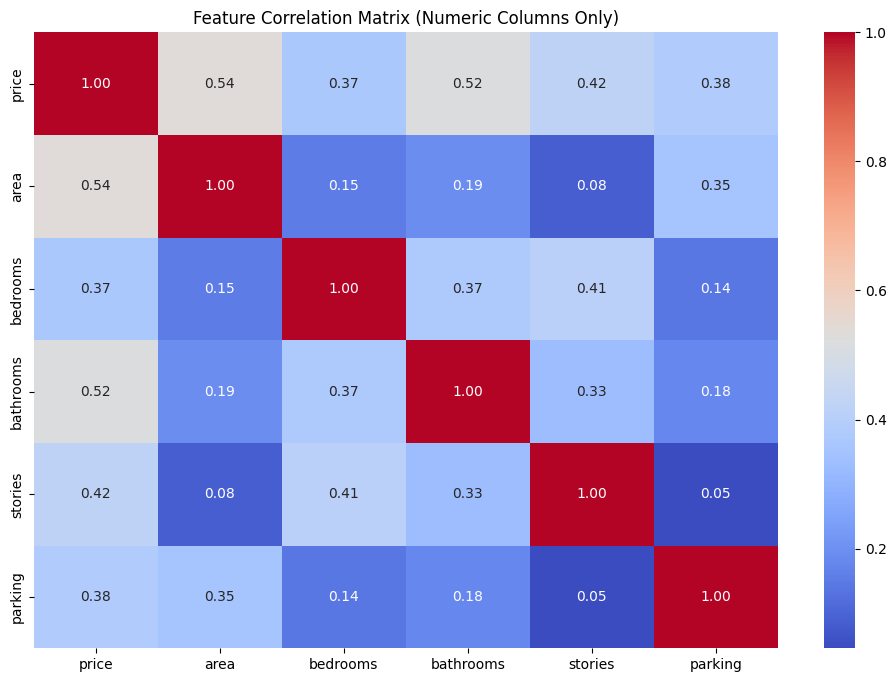

In [13]:
plt.figure(figsize=(12, 8))
# Select only numeric columns or encode categorical ones
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (Numeric Columns Only)")
plt.show()

## Step 3: Simple Linear Regression

In [15]:
# Try to automatically detect suitable columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [16]:
if len(numeric_cols) < 2:
    raise ValueError("Dataset needs at least 2 numeric columns for regression")

In [17]:
# Try to find common target column names
target_candidates = ['PRICE', 'Price', 'price', 'target', 'TARGET', 'MEDV', 'MEDVALUE', 'SalePrice', 'y']
feature_candidates = ['LSTAT', 'RM', 'AGE', 'area', 'size', 'SIZE', 'X1', 'feature', 'x']

In [18]:
# Find target column
y_col = None
for col in target_candidates:
    if col in df.columns:
        y_col = col
        break
if y_col is None:
    y_col = numeric_cols[-1]  # Use last numeric column as fallback

In [19]:
# Find feature column
x_col = None
for col in feature_candidates:
    if col in df.columns:
        x_col = col
        break
if x_col is None:
    x_col = numeric_cols[0]  # Use first numeric column as fallback

In [21]:
# Ensure we're not using the same column for both feature and target
if x_col == y_col:
    x_col = numeric_cols[1]  # Use second numeric column if conflict
print(f"Using '{x_col}' as feature and '{y_col}' as target")

Using 'area' as feature and 'price' as target


In [22]:
X = df[[x_col]]  # Feature needs to be 2D array (dataframe)
y = df[y_col]    # Target is 1D array (series)

In [23]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Create and train model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions
y_pred = simple_model.predict(X_test)

In [26]:
# Evaluate model
print("\nSimple Linear Regression Results:")
print(f"Feature: {x_col}")
print(f"Coefficient: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


Simple Linear Regression Results:
Feature: area
Coefficient: 425.7298
Intercept: 2512254.2640
MAE: 1474748.1338
MSE: 3675286604768.1851
RMSE: 1917103.7021
R² Score: 0.2729


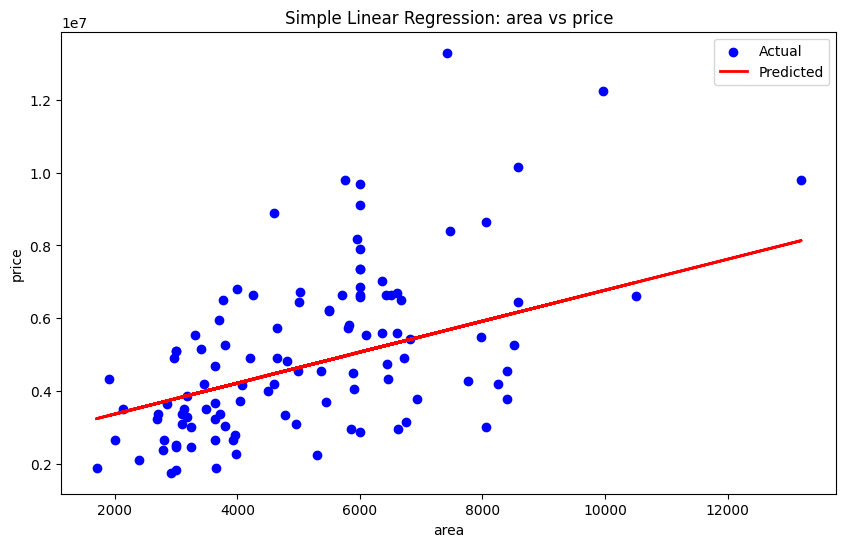

In [27]:
# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title(f'Simple Linear Regression: {x_col} vs {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend()
plt.show()